# Model Analytics & the Science of Predictive Modeling
## Regularization, Learning Curves and Model Assessment
***

Import all of the packages we will need.

In [3]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

from dstools import data_tools

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

### Complexity Control, revisited

Recall that one of the most important fundamental principles underlying data science, the basis for machine learning, is *complexity control*.  We must manage the tension between allowing ourselves to fit complex patterns in the data (a good thing), and the tendency to fit idiosyncracies in a particular data set--things that do not generalize (a bad thing).  So we attempt to control complexity.  One way to control complexity is just not to allow our data mining procedure to fit complex models in the first place.  That's what we do when we build linear models from small sets of features.  But let's consider the case where we think larger feature sets or non-linearities might add important predictive power--so we will attempt to control complexity in a data-driven fashion.

So let's create some example data that include non-linear features, using our script "data_tools". (You should be familiar with this after last class!)

In [4]:
# Get some data
target_name, variable_names, data, Y = data_tools.create_data()

# Grab the predictors with sufficient complexity (up to 3rd-order interaction terms)
X = data_tools.X(complexity=3)

X.tail()


,humor,number_pets,humor^2,humor^3
1795,15.726095,3.421895,247.310055,3889.221340
1796,18.287245,2.525489,334.423322,6115.681157
1797,24.366339,3.557690,593.718491,14466.746199
1798,22.905494,2.920013,524.661664,12017.634686
1799,21.120834,2.633541,446.089612,9421.784451


### Complexity control for logistic regression (regularization)

Recall that when fitting a logistic regression classifier, we try to find the set of weights, $\textbf{w}$, that maximize the fit to the data, based on some fit (objective) function. In this case, let's call our objective function $g()$, which means that we want $\arg\max_\textbf{w} g(\textbf{x}, \textbf{w})$.

Since we are trying to find the set of weight without too much complexity, when we perform **regularization** we **penalize** our fit as it gets more complex.  This is achieved by adding a "penalty term" into the objective function, and using a "regularization parameter" $\lambda$ (also sometimes represented as `c`, which is usually $\frac{1}{\lambda}$ so smaller values of `c` lead to larger complexity penalties) to specify how much importance our optimization procedure should place on the fit vs. the penalty:

$\arg\max_\textbf{w} g(\textbf{x}, \textbf{w}) - \lambda \cdot \text{penalty}(\textbf{w})$.

The two most common type of regularization in logistic regression are the so-called $L_1$ and $L_2$ regularizations, which simply use the sum of the weights (w) and the sum of the squares of the weights, respectively, as the penalty.



Fitting with L2 regularization: 



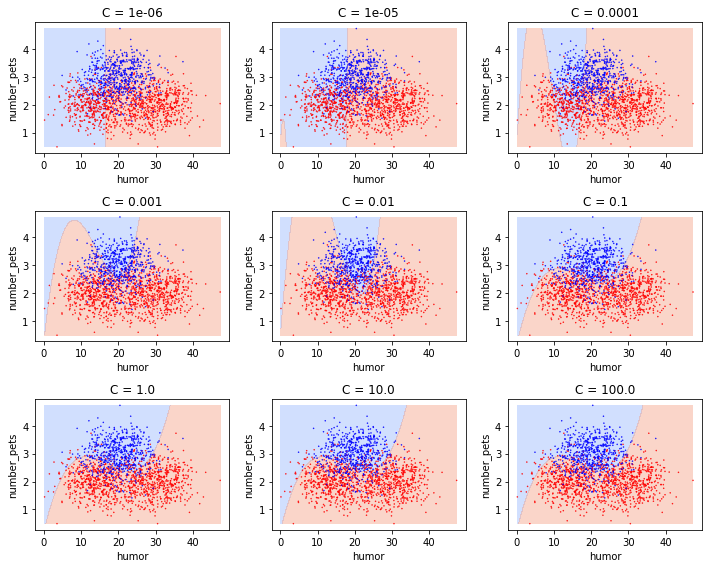


Fitting with L1 regularization: 



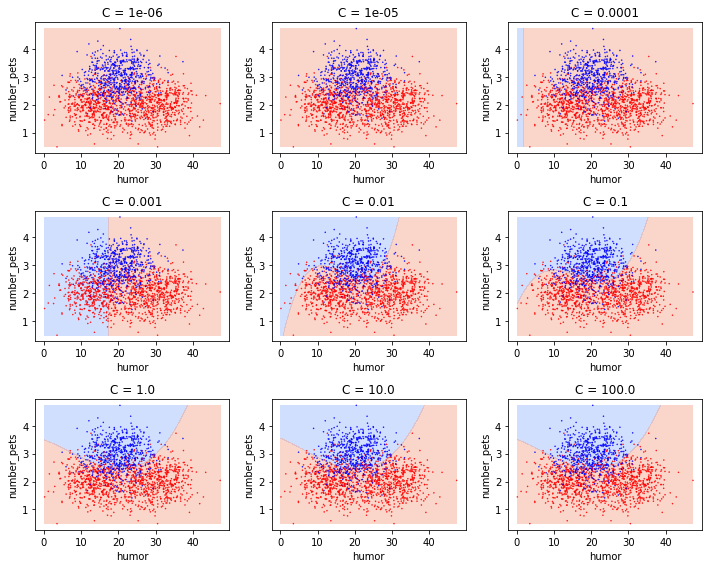

In [5]:
# Plot different regularization values for L1 and L2 regularization
for regularization in ['L2', 'L1']:
    # Get a table of the model coefficients
    coefs = pd.DataFrame(columns=['C'] + list(X.columns))
    
    # Print what we are doing
    print ("\nFitting with %s regularization: \n" % regularization)
    position = 0
    
    # Try some regularization values
    for i in range(-6,3):
        # Modeling
        c = np.power(10.0, i)
        model = LogisticRegression(penalty=regularization.lower(), C=c)
        model.fit(X, Y)
        
        # Plotting
        position += 1
        plt.subplot(3, 3, position)
        data_tools.Decision_Surface(X, Y, model, size=0.25)
        plt.title("C = " + str(np.power(10.0, i)))
        
        # Update coefficient table
        coefs.loc[i] = [c] + list(model.coef_[0])
    # Print and plot
    #print (coefs.to_string(index=False))
    plt.tight_layout()
    plt.show()
    

### Feature's weights with L1/L2  and normalization

Let's take a look to the different values of our weights with each type of penalty but first, let's understand **normalization**. 

What is normalization? Why do we need normalization? Each time we work with data, it is very important to consider the "scale" of the features. Some features might have distinct values from 1 to 1000, and other features might have values from 0 to 1. As many different data science/machine learning methods compare data along different dimensions, it can often be important to make sure the dimensions are comparable.

To do this re-scaling there are are many approaches, the most common being:

- _Normalization_ : we rescale our data so that the features have unit norms  
- _Standardization_ : we rescale our data acting as if each features is normally distributed (Gaussian with zero mean and unit variance)
- _Scaling to a range_ : we rescale our data based on the minimum and maximum value of each feature 


( sklearn has a built-in function to help us re-scaling our data -- see below)

**Let's take a look at the data before and after re-scaling.**

Before re-scaling:

In [6]:
X.head()

,humor,number_pets,humor^2,humor^3
0,18.382066,2.032090,337.900363,6211.306876
1,22.605496,2.451072,511.008446,11551.599351
2,12.440619,2.167963,154.768995,1925.422071
3,20.750973,1.728555,430.602888,8935.428974
4,12.046416,1.380707,145.116138,1748.129358


In [7]:

from sklearn.preprocessing import scale
X_scaled = pd.DataFrame(scale(X, axis=0, with_mean=True, with_std=True, copy=True), columns = X.columns.values)


After re-scaling:

In [8]:
X_scaled.head()

,humor,number_pets,humor^2,humor^3
0,-0.399842,-0.446807,-0.529337,-0.577447
1,0.123299,0.168356,-0.057665,-0.200824
2,-1.135788,-0.247313,-1.028320,-0.879708
3,-0.106414,-0.892468,-0.276748,-0.385329
4,-1.184617,-1.403191,-1.054621,-0.892211


In [9]:

summary = X_scaled.describe()
for column in summary: summary[column] = summary[column].apply(lambda x: round(x,1))
    
summary


,humor,number_pets,humor^2,humor^3
count,1800.0,1800.0,1800.0,1800.0
mean,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-2.7,-2.7,-1.4,-1.0
25%,-0.8,-0.7,-0.8,-0.8
50%,-0.1,-0.0,-0.2,-0.4
75%,0.7,0.7,0.6,0.5
max,3.2,3.5,4.6,6.4


### Visualizing the weights as we change the regularization

You should be able to notice that the result of **no regularization** (which in this case **for sklearn, it means a high value of C**, let's say C=1000) shows the following (and see the graph below--ignore the x-axis for the moment and just look at the y values): 

- Humor^2 has a weight close to zero
- Number_of_pets (orange line) has a greater weight than humor (blue line)
- Humor^3 has a weight close to five (red line)

In [10]:
MODEL2 = {}
MODEL1 = {}
MODEL0 = {}

for i in np.arange(-5, 5,0.5):  #go through a bunch of ascending regularization parameters
    
    LR_l1 = LogisticRegression(C=10**i, penalty = 'l1')
    LR_l1.fit(X_scaled, Y)
    MODEL1[10**i] = LR_l1.coef_[0] 
    
    LR_l2 = LogisticRegression(C=10**i, penalty = 'l2')
    LR_l2.fit(X_scaled, Y)
    MODEL2[10**i] = LR_l2.coef_[0]

    LR = LogisticRegression(C=1000)
    LR.fit(X_scaled, Y)
    MODEL0[10**i] = LR.coef_[0]

COLUMN_NAMES = X_scaled.columns.values
path_penalty2 = pd.DataFrame(MODEL2, index=COLUMN_NAMES ).transpose()
path_penalty1= pd.DataFrame(MODEL1, index=COLUMN_NAMES ).transpose()
path_penalty0= pd.DataFrame(MODEL0, index=COLUMN_NAMES ).transpose()


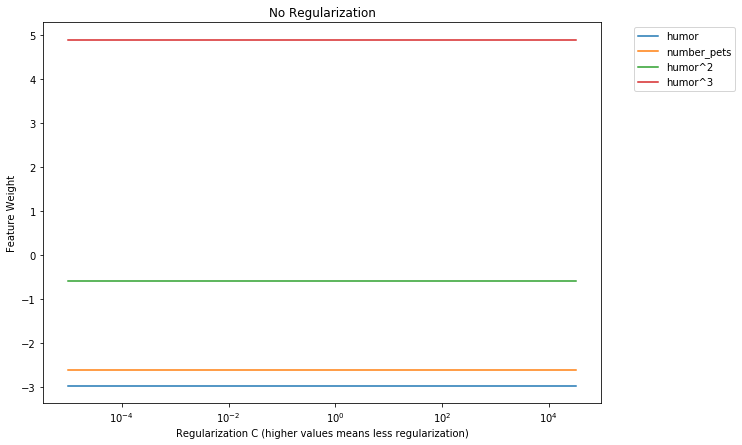

In [11]:
#Now plot the "regularization paths" -- how the model parameters change with regularization
#  First, without regularization at all, let's see what the parameters would be
plt.clf()
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

for f in COLUMN_NAMES : plt.plot(path_penalty0.index.values, path_penalty0[[f]], label=f)

ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), ncol=1, prop={'size':10})
plt.title('No Regularization')
plt.xlabel('Regularization C (higher values means less regularization)')
plt.ylabel('Feature Weight')
plt.xscale('log')
plt.show()


### Regularization

Once we plot the models with different penalties, we can see how the model weights change with more complexity control.

Also, you should be able to see that the different types of penalty (l1 or l2) create **different changes**:
    
- Humor^2 has a weight close to zero almost all the time for L1, but this is not the case with L2 
- Number_of_pets (orange line) has a smaller weight than humor (blue line) with more regularization (values of penalty below 10^0=1)
- The weight of Humor^3 decreases in different ways (paths)


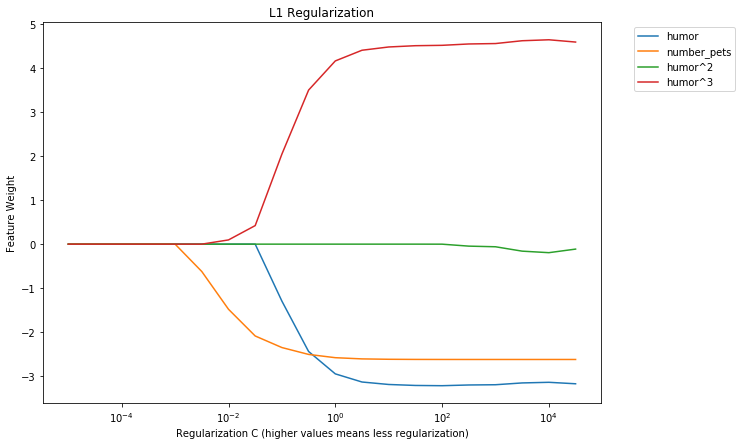

In [12]:
#Now plot the "regularization paths" -- how the model parameters change with regularization
# Now, let's actually plot the paths for L1 and L2 regularization
plt.clf()
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

for f in COLUMN_NAMES : plt.plot(path_penalty1.index.values, path_penalty1[[f]], label=f)

ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), ncol=1, prop={'size':10})
plt.title('L1 Regularization')
plt.xlabel('Regularization C (higher values means less regularization)')
plt.ylabel('Feature Weight')
plt.xscale('log')
plt.show()

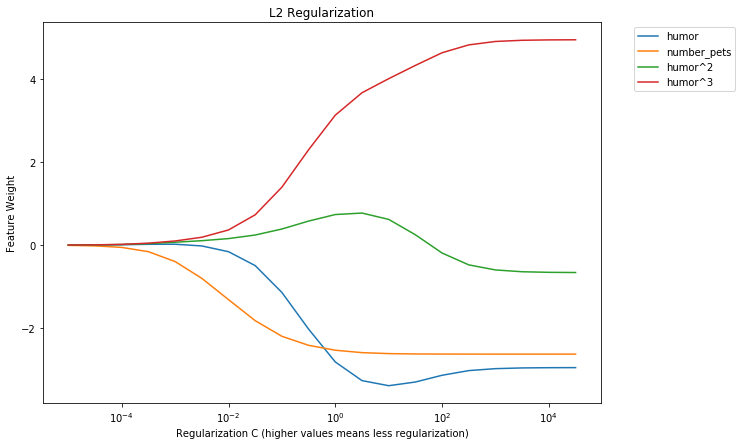

In [13]:
plt.clf()
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

for f in COLUMN_NAMES : plt.plot(path_penalty2.index.values, path_penalty2[[f]], label=f)

ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), ncol=1, prop={'size':10})
plt.title('L2 Regularization')
plt.xlabel('Regularization C (higher values means less regularization)')
plt.ylabel('Feature Weight')
plt.xscale('log')
plt.show()

### Learning curves for model assessment

We now can fit the data and deal with generalization and complexity control. Now we can start comparing different models, assessing classification accuracy.

You started doing this in your last homework, **tuning parameters** of a tree-structured model to improve the accuracy of the classifier (in this case, for the churn example). 

In the last homework, you used the following options: 

1. max_depth: To create trees with a specific maximum depth value (leaf nodes with a limited maximum number of edges from the root).
2. min_samples_split: To create a tree with a specific "minimum number of samples" required to _split_ an internal node.
3. min_samples_leaf: To create a tree with a specific "minimum number of samples" required to be at a _leaf_ node.

For those cases, you compared accuracies, using a unique **sample size** that we gave you.

But very often we also want to assess the relationship between how much data we are using to train the models, and the generalization performance we achieve.  For example, do we have a good idea whether we should invest in acquiring more training data? The only way to answer this question is again, experiment with different sample sizes. The main way to do this assessment is via **_learning curves_**: analyze the change of the generalization performance (accuray on the holdout data, in this case) based on different sizes of the training set.

What would we expect to see? Holding everything else fixed, the generalization should be better with more training data, up until a certain point. Then, more data won't increase generalization performance. 

Thus, learning curves will help to determine at least 2 things:

- We can see which model performs better or worse for each sample size (e.g. Decision Tree vs Logistic Regression)
- We can get a sense of whether getting more data (or using less) will improve (or not degrade) generalization.


<img src="dstools/learning.png" alt="Drawing" style="width: 600px;"/>


**Note**: Often learning curves use a log scale on the x-axis, which I didn't do in that graph just presented.  Imagine above how that would give more detail on the interesting part of the curves.  Try it!   [You can see how to use a log scale in matplotlib in the code above.]

### Hands-on

Let's start to actually work with the **predictions** of a learned model.  Use Logistic Regression with L2 regularization with c = 0.1.

Create a Data Frame with 2 columns: one with the predicted-label ($\hat{y}$) and one with the actual label (y). 

- Count the number of people (rows) who got success="1" in the model ($\hat{y}$) when their actual label is "1".
- Count the number of people (rows) who got success="0" in the model ($\hat{y}$) when their actual label is "1".

- Compute some stats looking at these errors in different ways.

**When you read Chapters 7 & 8, think about this.**


In [20]:
# Code here!

